In [30]:
import sys
import os
sys.path.append(os.path.abspath('../'))

from uvotimgpy.utils.image_operation import DS9Converter, rotate_image, align_images
from uvotimgpy.uvot_image.star_cleaner import BackgroundCleaner
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

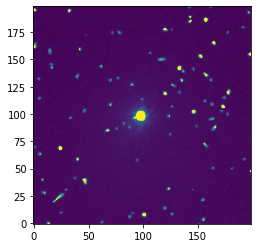

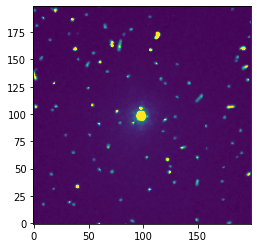

In [31]:
img_dict = {'18':(760,872),
            #'20':(773,884),
            '24':(766,877),
            #'26':(778,889)
            }
img_list = []
target_list = []
for imgid in img_dict.keys():
    x, y = img_dict[imgid]
    hdul = fits.open('/Volumes/ZexiWork/data/HST/29P/2019/'+imgid+'.fits')
    img = hdul[1].data
    angle = float(hdul[1].header['ORIENTAT'])
    col, row = DS9Converter.ds9_to_coords(x, y)[2:]
    target_list.append((col, row))

    img = rotate_image(img, source_coord=(col,row), angle=angle, fill_value=np.nan)
    img_list.append(img)

new_source_coord_ds9 = (100,100)
col, row = DS9Converter.ds9_to_coords(new_source_coord_ds9[0], new_source_coord_ds9[1])[2:]
img_list = align_images(img_list, target_list, (col,row))

for img in img_list:
    plt.imshow(img, vmin=0, vmax=2, origin='lower')
    plt.show()

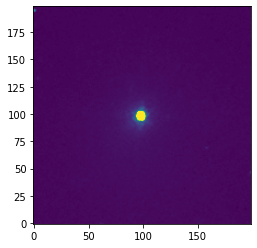

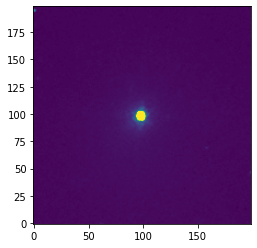

In [32]:
img_a = img_list[0]
img_b = img_list[1]
cleaner = BackgroundCleaner()
cleaned_a, cleaned_b = cleaner.process_image_pair(img_a, img_b)

plt.imshow(cleaned_a, vmin=0, vmax=2, origin='lower')
plt.show()

plt.imshow(cleaned_b, vmin=0, vmax=2, origin='lower')
plt.show()


The two images are almost the same, which indicates a over-mask.